#**Task-2: Prediction using UnSupervised ML**

Author - Meeti Shah

GRIP: The Sparks Foundation

Data Science & Business Analytics Intern



In [ ]:
#importing the required librariers 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Species'] = iris.target
data['Species'] = data['Species'].replace(to_replace= [0, 1, 2], value = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#Viewing first 10 rows
data.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.shape   #Checking the Shape of the dataset

(150, 5)

In [ ]:
data.info()   #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()      #descriptive statistics summary of a given dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Predicting Optimal Number of Clusters using using KMeans Clustering Algorithm.**

In [ ]:
 
X = data.iloc[:, [0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    


In [ ]:
pd.DataFrame({"No. of Clusters": range(1,11), "WCSS Value": wcss})  #Within-Cluster-Sum of Squared Errors

,No. of Clusters,WCSS Value
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.472230
5,6,39.039987
6,7,34.299712
7,8,30.063111
8,9,28.271722
9,10,26.094325


# **Plotting Number of Clusters vs. WCSS Value**

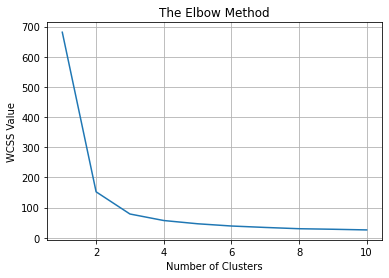

In [ ]:

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.grid()
plt.show()

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_kmeans = kmeans.fit_predict(X)

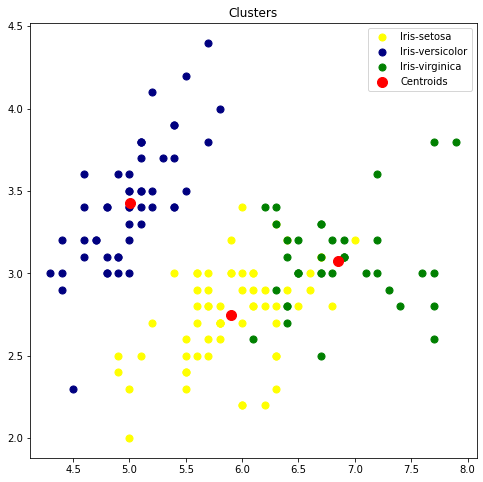

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = [8,8])
plt.scatter(X[Y_kmeans == 0,0], X[Y_kmeans == 0,1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[Y_kmeans == 1,0], X[Y_kmeans == 1,1], s = 50, c = 'navy', label = 'Iris-versicolor')
plt.scatter(X[Y_kmeans == 2,0], X[Y_kmeans == 2,1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

# **From observing the Elbow plot ,we can say that k=3 is the optimum number of cluster for this dataset**